# Task-3 Graduate Rotational Internship Program (GRIP - Feb 2021) organised by The Sparks Foundation.¶


# Author: Sana (Intern march 2021)

# Exploratory Data Analysis - Retail

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

# Aim: To find weak areas that could be processed to make profit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
store = pd.read_csv('SampleSuperstore.csv')

In [3]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Variable Category:

# Categorical:

Ship Mode
Segment
Country
City
State
Region
Postal Code
Category
Sub-Category

# Continuous:

Profit
Sales

# Continuous:

Profit
Sales

In [5]:
store.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# From here we can see that there are null values, so we do not have to bother about missing value treatment

In [6]:
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# 1. We can see that there is just 1 country so we can drop the Country Coloumn

2. Postal codes are very specific and large to be categorized, also the state,city and regions are given so it won't make much of a difference so we can drop it as well.

In [7]:
del store['Country']
del store['Postal Code']

In [8]:
store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
store.duplicated().sum()

50

In [10]:
store.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Univariate Analysis

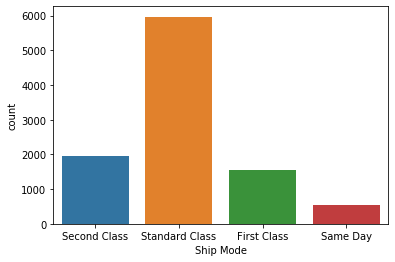

In [11]:
sns.countplot('Ship Mode', data=store)

# Maximum people opt for Standard Shipping Mode

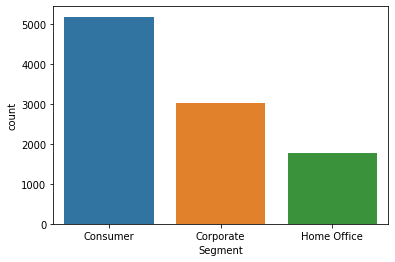

In [12]:
sns.countplot('Segment', data=store)

# Maximum Sales is in Consumer Industry

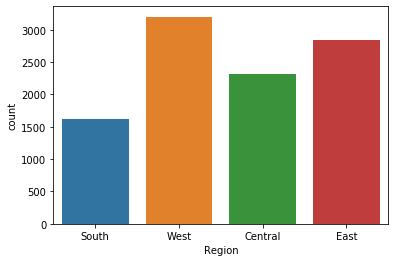

In [13]:
sns.countplot('Region', data=store)

# Maximum Sales is in West Region

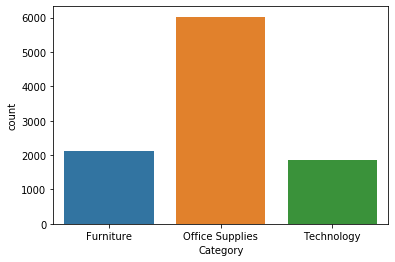

In [14]:
sns.countplot('Category', data=store)

# Maximum Sales is in The Category of Office

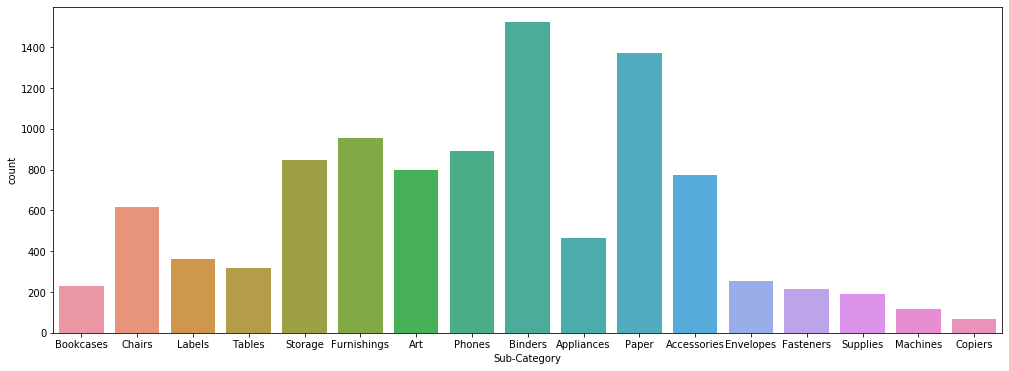

In [15]:
plt.figure(figsize=(17,6))
sns.countplot('Sub-Category', data=store)

# Binders followed by Paper are the Most sold products in the sub category

In [16]:
store['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

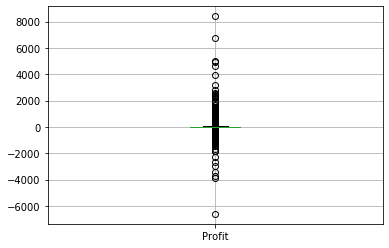

In [17]:
store.boxplot(column = ['Profit'])

In [18]:
print(store['Profit'].skew())

7.561431562468343


# The skewness value of 7.5 shows that the variable 'Profit' has a right-skewed distribution, indicating the presence of extreme higher values.

   .We will cap our outliers to 10th and 90th percentile

In [23]:
print(store['Profit'].quantile(0.10))
print(store['Profit'].quantile(0.90))

-15.47346
89.28162000000006


In [22]:
store['Profit'] = np.where(store['Profit']<-15.47346,-15.47346,str['Profit'])
store['Profit'] = np.where(store['Profit']>89.28162,89.28162,str['Profit'])
print(store['Profit'].skew())

TypeError: 'type' object is not subscriptable

In [ ]:
store['Sales'].describe()

In [ ]:
store.boxplot(column = ['Sales'])

In [ ]:
print(store['Sales'].skew())

In [ ]:
print(store['Sales'].quantile(0.10))
print(store['Sales'].quantile(0.90))

In [ ]:
store['Sales'] = np.where(str['Sales']<7.8972,7.8972,str['Sales'])
store['Sales'] = np.where(str['Sales']>572.7060,572.7060,str['Sales'])
print(store['Sales'].skew())

In [ ]:
store['Sales'].describe()

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(str.corr(), annot=True, xticklabels='auto', yticklabels='auto', linewidth=2.5)

# 1.There is a positive Correlation between Sales and Profit. (Sales Increase Profit Increases)
2.There is a positive Correlation between Quantity and Profit. (Quantity Increase Profit Increases)
3.There is a Negative Correlation between Profit and Discount. (Discount Increase Profit Decreases)
4.There is a Negative Correlation between Sales and Discount. (Sales Increase Discount Decreases)
5.Nearly no correlation between Quantity and Discount. (0 Correlation)

# Profit Associated with Segment

In [ ]:
a = pd.pivot_table(str, index='Segment', values='Profit')
a.plot(kind = 'bar', subplots=True, figsize=(10,5))

In [ ]:
array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8CABEE160>],
      dtype=object)

# Home Offices give the most profit

In [ ]:
Profit Associated with Sub-Categories

In [ ]:
b = pd.pivot_table(store, index='Sub-Category', values='Profit')
b.plot(kind = 'bar', color='Yellow', figsize=(10,5), fontsize=10)

# Copiers give the most profit

# Sales in association with States

In [ ]:
c = pd.pivot_table(store, index='State', values='Sales')
c.plot(kind = 'bar', color='red', figsize=(20,10), fontsize=15)

# Maximum Sales is in Wyoming State

# Segment and Region Columns

In [ ]:
sns.barplot(data = store, x='Region', y='Profit', hue= 'Segment', palette='hsv' )
plt.show()

# Central Region has Less number of concumers

In [ ]:
sns.barplot(data = store, x='Region', y='Profit', hue= 'Category', palette='Pastel2')
plt.show()

In [ ]:
1. sale of furniture is significantly low in Central and Eastern Regions.
2. There is very low office supply in Central Region.

# Lineplots

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot('Quantity', 'Profit', data = store, color = 'y', label= 'Profit Vs Quantity')
plt.legend()

# constant increment in Profit with increase in Quantity

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = store, color = 'b', label= 'Profit Vs Discount')
plt.legend()

In [ ]:
Conclusion
1.The superstore incures losses by giving discounts.
2.But if they stop giving Discounts their Sales will be impacted and they won't be able to attract more long term customers.
3.Discounts are offered during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock.
4.By incurring small losses, the company gains in the future by attracting more long term customers.
5.The small losses from discounts are an essential part of company's business

# Dashboard

In [ ]:
import pywedge as pw

In [ ]:
mc = pw.Pywedge_Charts(str, c=None, y='Profit')
charts = mc.make_charts()